In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import geopy.distance



data = pd.read_csv('/content/drive/MyDrive/Subway Fundamental Diagram/Oct. 18/Line1.csv')
stop = pd.read_csv('/content/drive/MyDrive/Subway Fundamental Diagram/Oct. 18/stop_train.csv')

In [ ]:
stop = stop[stop['train']=='1']
coords_last = (40.889248, -73.898583) # coordinate of Van Cortlandt Park-242 St, last stop of Line 1
stop['dis'] = [geopy.distance.geodesic(
    (stop['stop_lat'].iloc[i-1],stop['stop_lon'].iloc[i-1]),
    (stop['stop_lat'].iloc[i],stop['stop_lon'].iloc[i])).m for i in range(len(stop))]
# coords = (lat,lon)
stop['dis'][0]=0
stop['dis'] = stop['dis'].drop(stop[stop['dis']>2000].index)
stop['cumdis'] = stop['dis'].cumsum()

<ipython-input-6-8e027d688251>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop['dis'][0]=0


In [ ]:
data['stop_id'] = data['stop_id'].apply(lambda x: str(x))
mdata = pd.merge(data,stop,how = 'left',left_on = 'stop_id',right_on = 'stop_id')
mdata['direction'] = mdata['train+direction'].apply(lambda x: x[3])
mdata.head()

,Unnamed: 0_x,Unnamed: 0.1,trip_id,stop_id,arrival_time,departure_time,stop_sequence,service_id,sub_trip_id,train+direction,...,day,Unnamed: 0_y,train_y,stop_name,stop_lat,stop_lon,node_id,dis,cumdis,direction
0,0,0,ASP22GEN-1037-Sunday-00_000600_1..S03R,101,00:06:00,00:06:00,1,ASP22GEN-1037-Sunday-00,600,1..S03R,...,Sunday,0,1,Van Cortlandt Park-242 St,40.889248,-73.898583,101_1,0.000000,0.000000,S
1,1,1,ASP22GEN-1037-Sunday-00_000600_1..S03R,103,00:07:30,00:07:30,2,ASP22GEN-1037-Sunday-00,600,1..S03R,...,Sunday,1,1,238 St,40.884667,-73.900870,103_1,544.017431,544.017431,S
2,2,2,ASP22GEN-1037-Sunday-00_000600_1..S03R,104,00:09:00,00:09:00,3,ASP22GEN-1037-Sunday-00,600,1..S03R,...,Sunday,2,1,231 St,40.878856,-73.904834,104_1,726.682024,1270.699455,S
3,3,3,ASP22GEN-1037-Sunday-00_000600_1..S03R,106,00:10:30,00:10:30,4,ASP22GEN-1037-Sunday-00,600,1..S03R,...,Sunday,3,1,Marble Hill-225 St,40.874561,-73.909831,106_1,636.326424,1907.025879,S
4,4,4,ASP22GEN-1037-Sunday-00_000600_1..S03R,107,00:12:00,00:12:00,5,ASP22GEN-1037-Sunday-00,600,1..S03R,...,Sunday,4,1,215 St,40.869444,-73.915279,107_1,730.631631,2637.657510,S


In [ ]:
import re
mdata['arrival_time'] = mdata['arrival_time'].apply(lambda x: re.sub('^24','00',str(x)))
mdata['arrival_time'] = mdata['arrival_time'].apply(lambda x: re.sub('^25','01',str(x)))

mdata['time'] = pd.to_datetime(mdata['arrival_time'],infer_datetime_format=True)

In [ ]:
plt_data = mdata[['stop_id','time','trip_id','cumdis','direction','stop_name']]
plt_data

,stop_id,time,trip_id,cumdis,direction,stop_name
0,101,2022-12-05 00:06:00,ASP22GEN-1037-Sunday-00_000600_1..S03R,0.000000,S,Van Cortlandt Park-242 St
1,103,2022-12-05 00:07:30,ASP22GEN-1037-Sunday-00_000600_1..S03R,544.017431,S,238 St
2,104,2022-12-05 00:09:00,ASP22GEN-1037-Sunday-00_000600_1..S03R,1270.699455,S,231 St
3,106,2022-12-05 00:10:30,ASP22GEN-1037-Sunday-00_000600_1..S03R,1907.025879,S,Marble Hill-225 St
4,107,2022-12-05 00:12:00,ASP22GEN-1037-Sunday-00_000600_1..S03R,2637.657510,S,215 St
...,...,...,...,...,...,...
39587,107,2022-12-05 01:47:00,ASP22GEN-1091-Weekday-00_149900_1..N03R,2637.657510,N,215 St
39588,106,2022-12-05 01:48:30,ASP22GEN-1091-Weekday-00_149900_1..N03R,1907.025879,N,Marble Hill-225 St
39589,104,2022-12-05 01:50:00,ASP22GEN-1091-Weekday-00_149900_1..N03R,1270.699455,N,231 St
39590,103,2022-12-05 01:51:30,ASP22GEN-1091-Weekday-00_149900_1..N03R,544.017431,N,238 St


In [ ]:
plt_data['t_diff'] = plt_data.groupby('trip_id')['time'].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')
plt_data = plt_data.drop(plt_data[plt_data.t_diff<0].index)

<ipython-input-10-32864fee627c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_data['t_diff'] = plt_data.groupby('trip_id')['time'].diff().apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')


In [ ]:
plt_data['t'] = plt_data['t_diff'].cumsum()

In [ ]:
df = plt_data[plt_data.direction == 'S']
# df = plt_data
vehicle_id=df.trip_id.drop_duplicates().tolist()
df_simple=df[['trip_id','t','cumdis']]
df_simple.head()

,trip_id,t,cumdis
0,ASP22GEN-1037-Sunday-00_000600_1..S03R,0,0.000000
1,ASP22GEN-1037-Sunday-00_000600_1..S03R,90,544.017431
2,ASP22GEN-1037-Sunday-00_000600_1..S03R,180,1270.699455
3,ASP22GEN-1037-Sunday-00_000600_1..S03R,270,1907.025879
4,ASP22GEN-1037-Sunday-00_000600_1..S03R,360,2637.657510


In [ ]:
df.to_csv('df.csv')

Text(0, 0.5, 'location')

<Figure size 432x288 with 0 Axes>

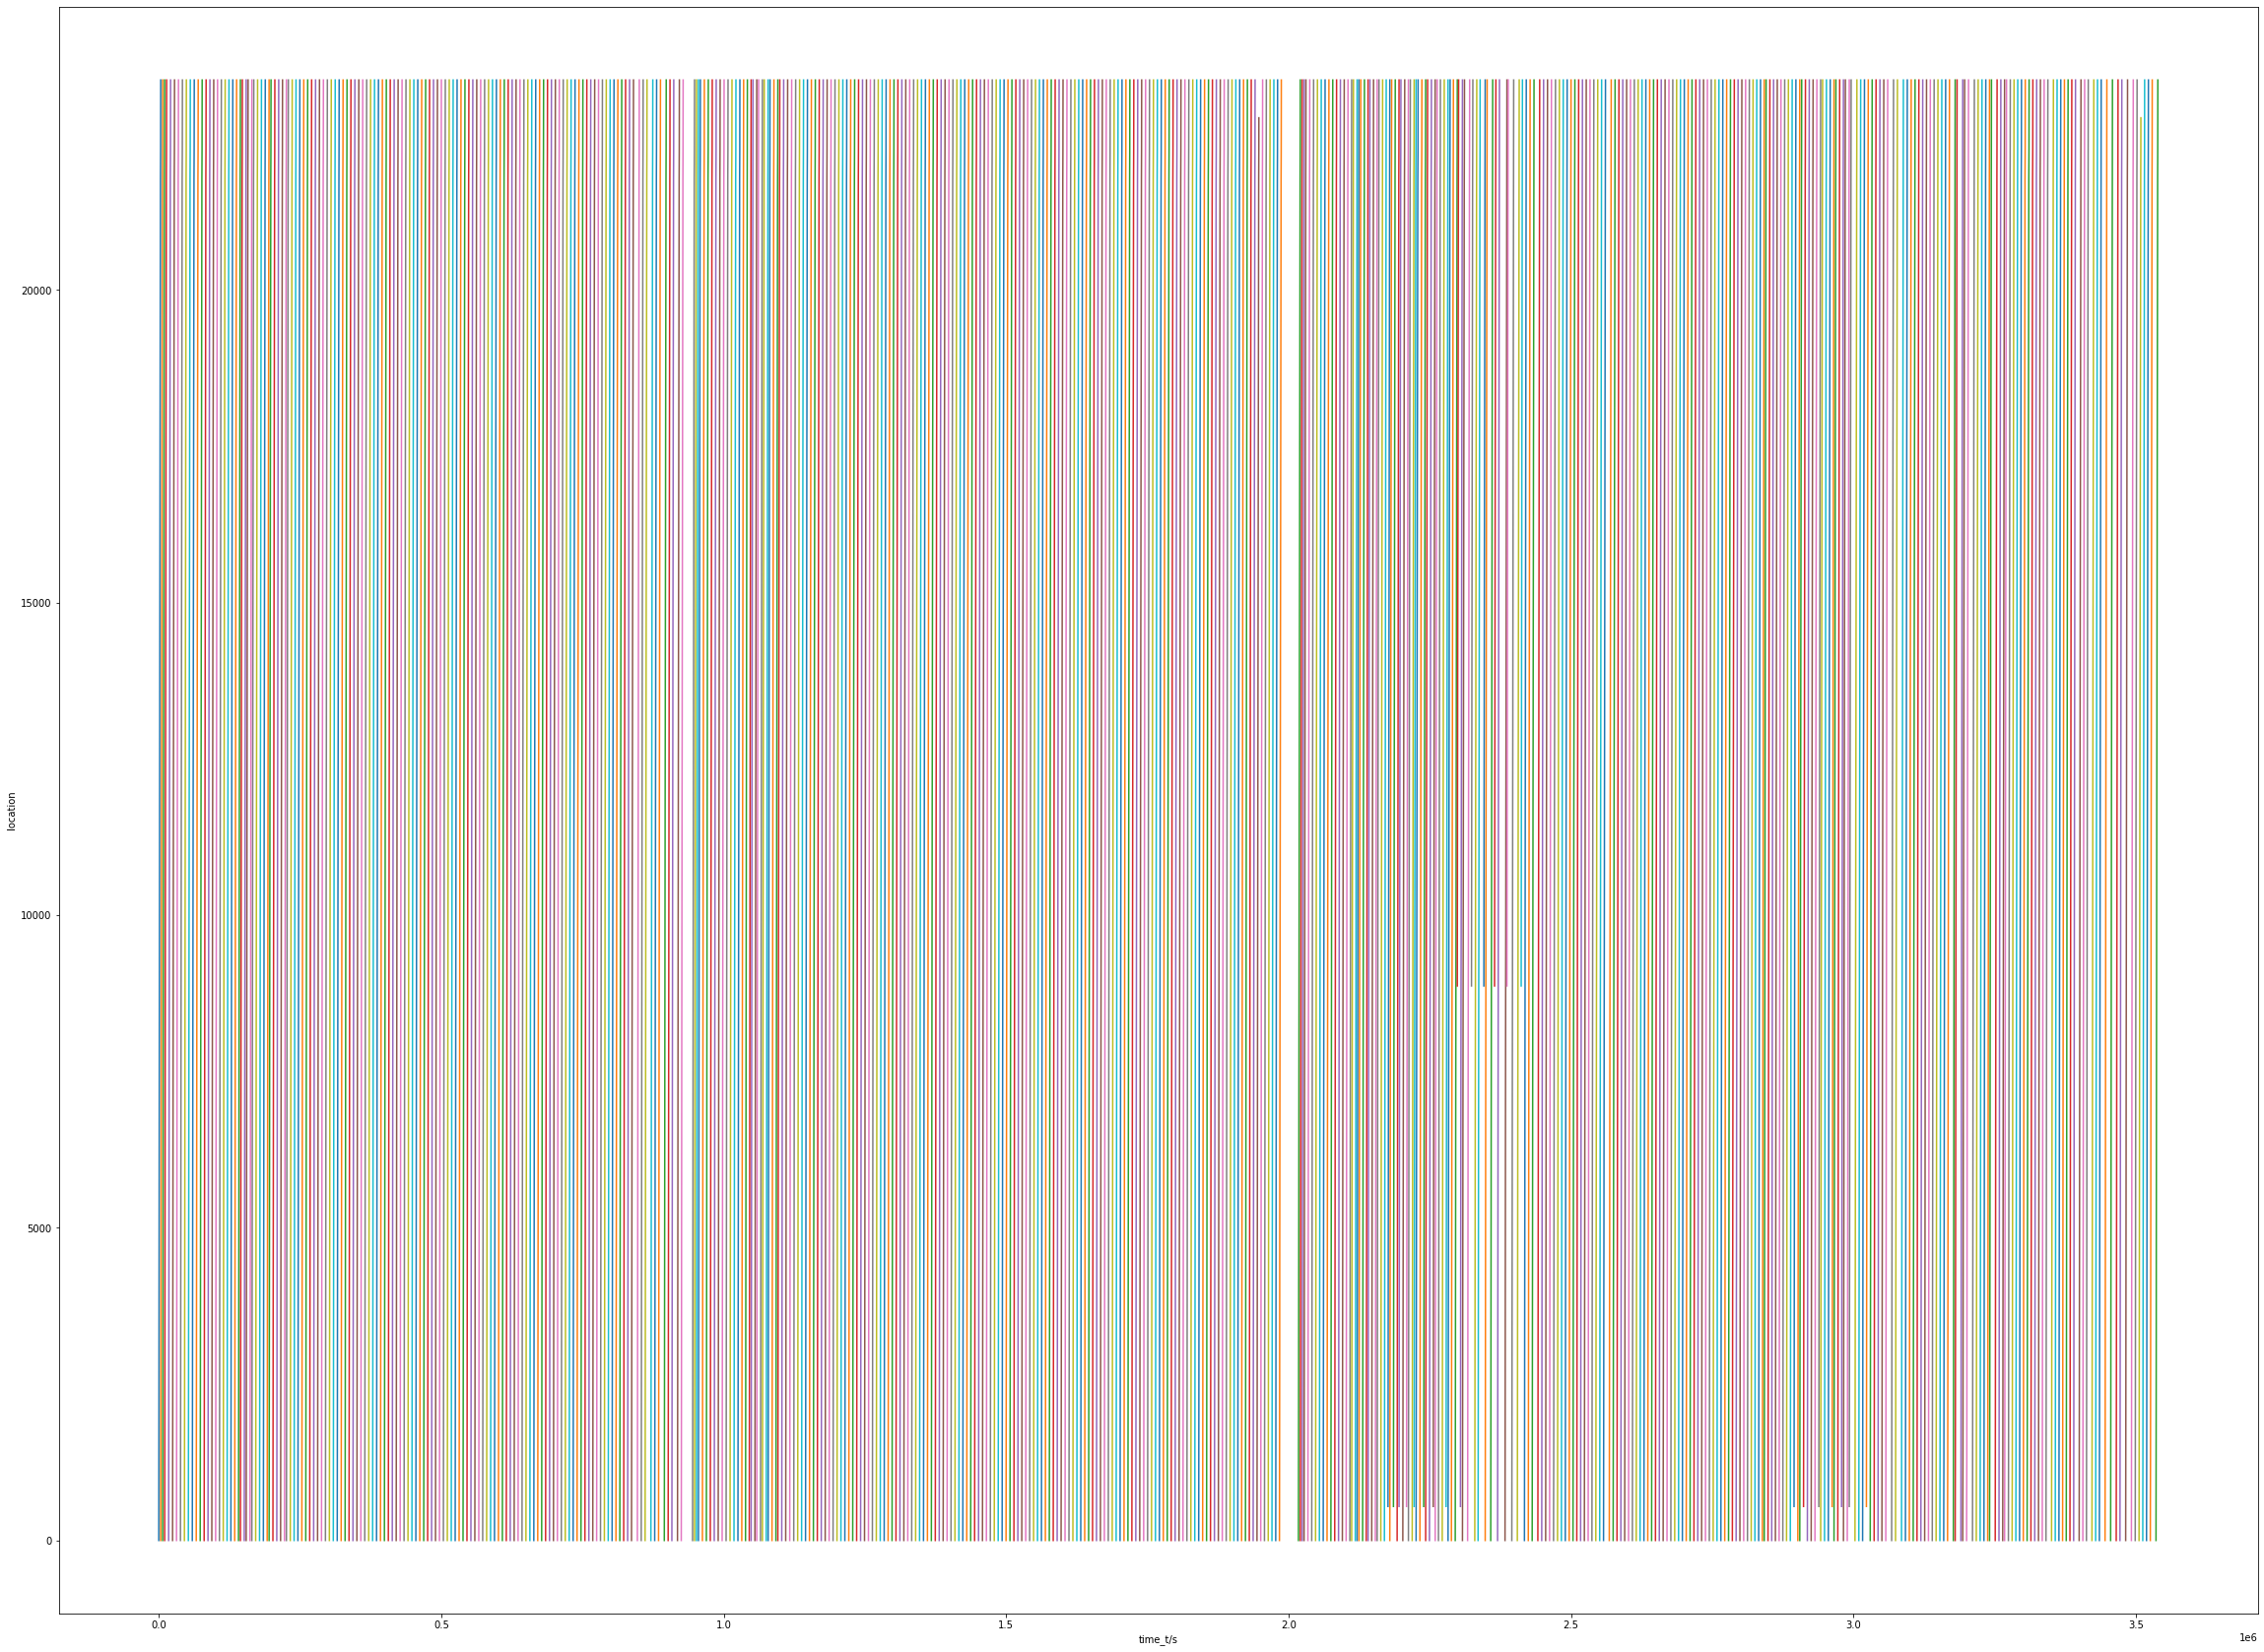

In [ ]:
from matplotlib.pyplot import figure
from matplotlib import pyplot

vehicle_id=df.trip_id.drop_duplicates().tolist()
vehicle_id

# Creates a figure 
fig = pyplot.figure()
figure(figsize=(40, 30))
for i in vehicle_id:
    df_pic=df_simple[df_simple['trip_id'] == i] 
    pyplot.plot(df_pic['t'], df_pic['cumdis'])

pyplot.xlabel('time_t/s')
pyplot.ylabel('location')

Text(0, 0.5, 'location')

<Figure size 432x288 with 0 Axes>

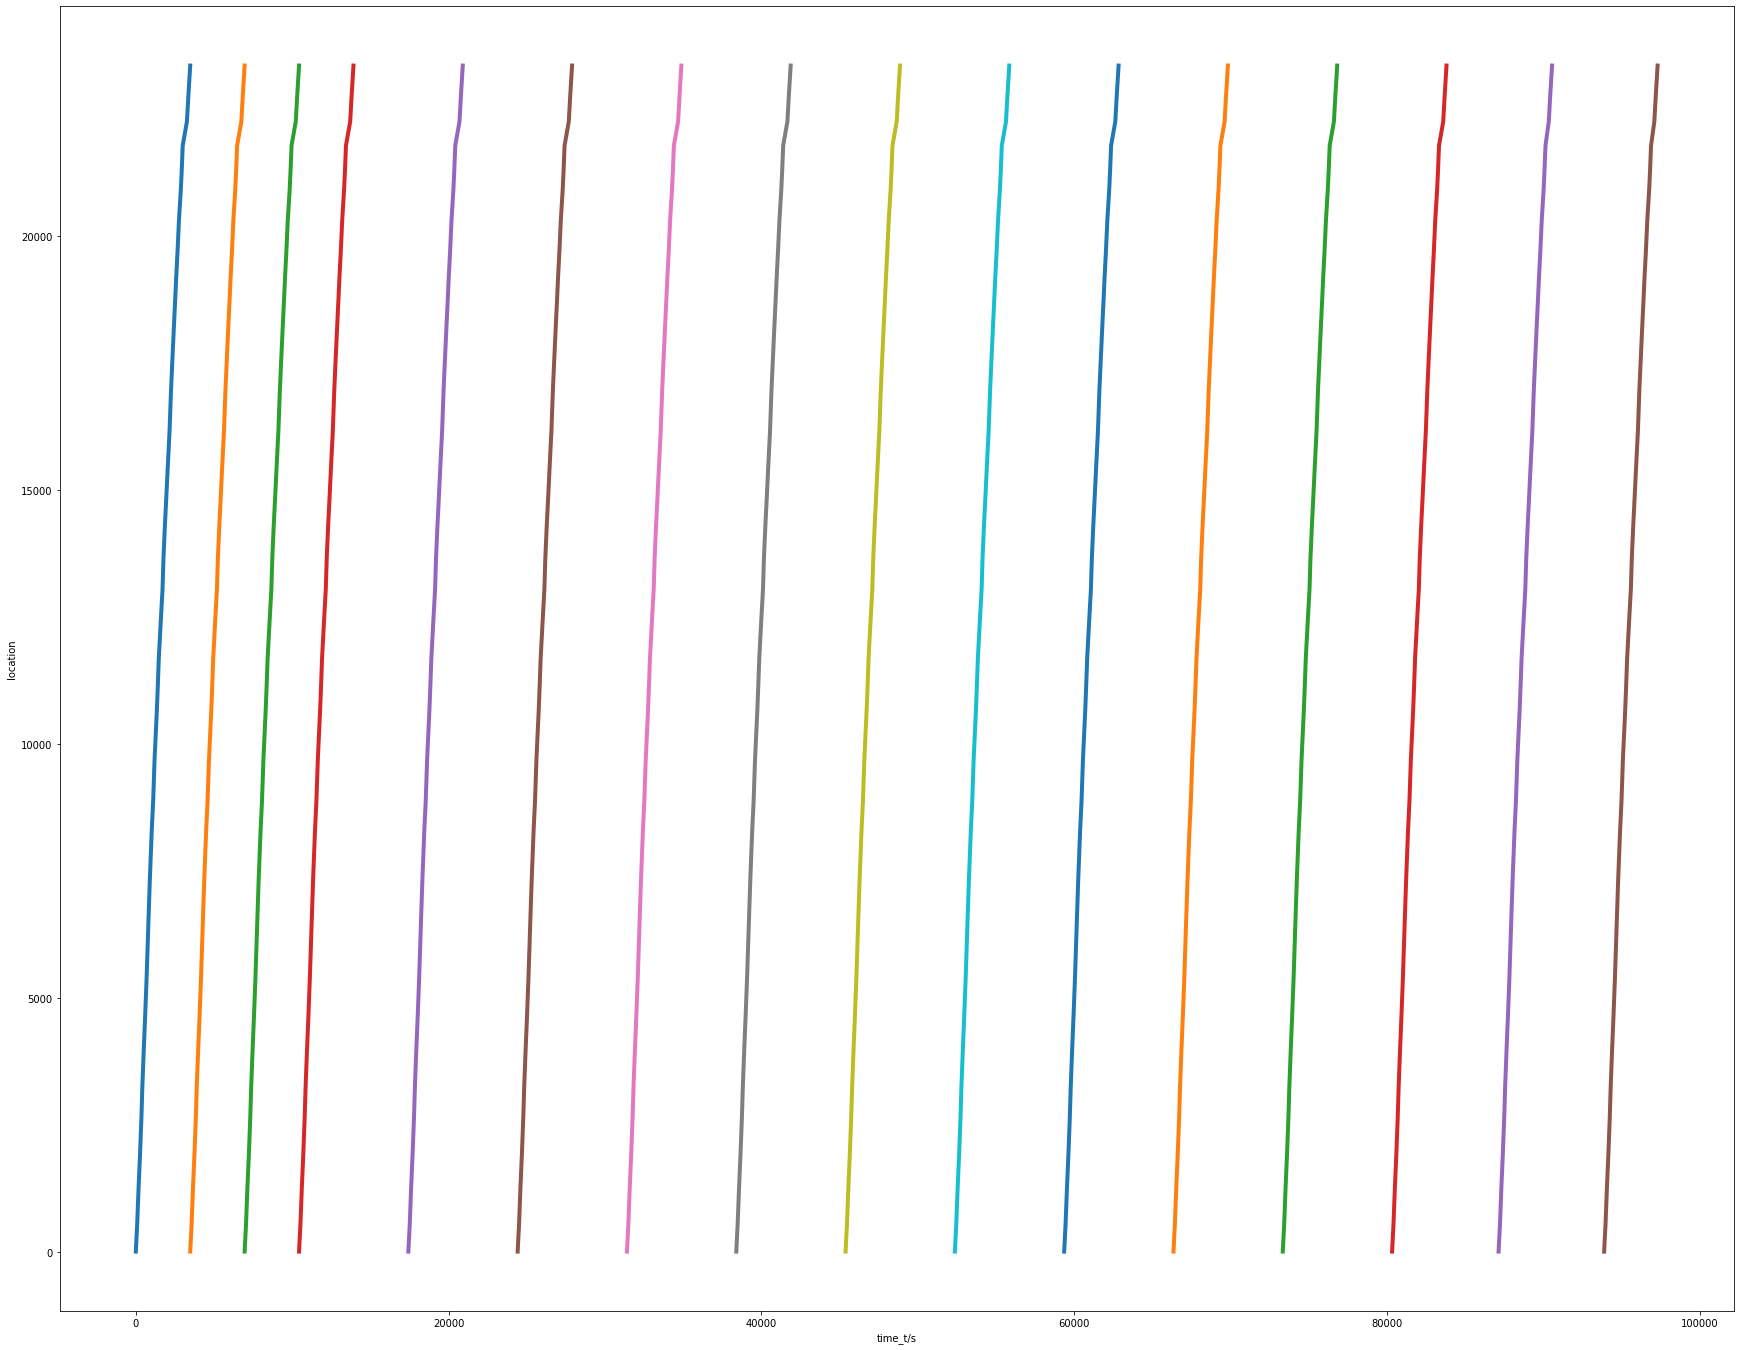

In [ ]:
fig = pyplot.figure()
figure(figsize=(30, 24))
df_2=df_simple[df_simple['t'] <= 100000] 
for i in vehicle_id:
    df_pic2=df_2[df_2['trip_id'] == i] 
    pyplot.plot(df_pic2['t'], df_pic2['cumdis'],linewidth=4)

pyplot.xlabel('time_t/s')
pyplot.ylabel('location')

# contol time_len and location_len

In [ ]:
df_simple

,trip_id,t,cumdis
0,ASP22GEN-1037-Sunday-00_000600_1..S03R,0,0.000000
1,ASP22GEN-1037-Sunday-00_000600_1..S03R,90,544.017431
2,ASP22GEN-1037-Sunday-00_000600_1..S03R,180,1270.699455
3,ASP22GEN-1037-Sunday-00_000600_1..S03R,270,1907.025879
4,ASP22GEN-1037-Sunday-00_000600_1..S03R,360,2637.657510
...,...,...,...
39359,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538590,21311.983000
39360,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538650,21783.446887
39361,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538830,22257.389508
39362,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538920,22755.906420


In [ ]:
df_simple.to_csv('dfsimple.csv')

In [ ]:
time_len=36000
location_len=10000
time_min=df_simple['t'].min()
location_min=df_simple['cumdis'].min()
df_simple['time_number']=df_simple['t']//time_len
df_simple['location_number']=df_simple['cumdis']//location_len
df_simple

<ipython-input-17-f208b4a1fcb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['time_number']=df_simple['t']//time_len
<ipython-input-17-f208b4a1fcb6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['location_number']=df_simple['cumdis']//location_len


,trip_id,t,cumdis,time_number,location_number
0,ASP22GEN-1037-Sunday-00_000600_1..S03R,0,0.000000,0,0.0
1,ASP22GEN-1037-Sunday-00_000600_1..S03R,90,544.017431,0,0.0
2,ASP22GEN-1037-Sunday-00_000600_1..S03R,180,1270.699455,0,0.0
3,ASP22GEN-1037-Sunday-00_000600_1..S03R,270,1907.025879,0,0.0
4,ASP22GEN-1037-Sunday-00_000600_1..S03R,360,2637.657510,0,0.0
...,...,...,...,...,...
39359,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538590,21311.983000,98,2.0
39360,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538650,21783.446887,98,2.0
39361,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538830,22257.389508,98,2.0
39362,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538920,22755.906420,98,2.0


In [ ]:
df_simple.sort_values(by=['time_number','location_number'],ascending=False)
df_simple

,trip_id,t,cumdis,time_number,location_number
0,ASP22GEN-1037-Sunday-00_000600_1..S03R,0,0.000000,0,0.0
1,ASP22GEN-1037-Sunday-00_000600_1..S03R,90,544.017431,0,0.0
2,ASP22GEN-1037-Sunday-00_000600_1..S03R,180,1270.699455,0,0.0
3,ASP22GEN-1037-Sunday-00_000600_1..S03R,270,1907.025879,0,0.0
4,ASP22GEN-1037-Sunday-00_000600_1..S03R,360,2637.657510,0,0.0
...,...,...,...,...,...
39359,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538590,21311.983000,98,2.0
39360,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538650,21783.446887,98,2.0
39361,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538830,22257.389508,98,2.0
39362,ASP22GEN-1091-Weekday-00_143250_1..S03R,3538920,22755.906420,98,2.0


In [ ]:
df_simple.groupby(['time_number', 'location_number'])['trip_id'].nunique()

time_number  location_number
0            0.0                7
             1.0                7
             2.0                7
1            0.0                5
             1.0                5
                               ..
97           1.0                6
             2.0                5
98           0.0                1
             1.0                2
             2.0                2
Name: trip_id, Length: 297, dtype: int64

In [ ]:
df_cal=pd.DataFrame()
df_cal['total_time_elapsed']=df_simple.groupby(['time_number', 'location_number'])['trip_id'].nunique()
df_cal.sort_values(by=['time_number','location_number'],ascending=True)

total_time_elapsed
time_number location_number                    
0           0.0                               7
            1.0                               7
            2.0                               7
1           0.0                               5
            1.0                               5
...                                         ...
97          1.0                               6
            2.0                               5
98          0.0                               1
            1.0                               2
            2.0                               2

[297 rows x 1 columns]

In [ ]:
max=df_simple.groupby(['trip_id','time_number', 'location_number'])['cumdis'].max()
min=df_simple.groupby(['trip_id','time_number', 'location_number'])['cumdis'].min()
distance=max-min
df_1=pd.DataFrame()
df_1=distance.reset_index()
df_1


,trip_id,time_number,location_number,cumdis
0,ASP22GEN-1037-Sunday-00_000600_1..S03R,0,0.0,9685.172214
1,ASP22GEN-1037-Sunday-00_000600_1..S03R,0,1.0,9017.803509
2,ASP22GEN-1037-Sunday-00_000600_1..S03R,0,2.0,3048.929033
3,ASP22GEN-1037-Sunday-00_002600_1..S03R,0,0.0,9685.172214
4,ASP22GEN-1037-Sunday-00_002600_1..S03R,0,1.0,9017.803509
...,...,...,...,...
1608,ASP22GEN-1091-Weekday-00_141850_1..S03R,98,1.0,2132.858369
1609,ASP22GEN-1091-Weekday-00_141850_1..S03R,98,2.0,3048.929033
1610,ASP22GEN-1091-Weekday-00_143250_1..S03R,98,0.0,9685.172214
1611,ASP22GEN-1091-Weekday-00_143250_1..S03R,98,1.0,9017.803509


In [ ]:
df_cal['distance']=df_1.groupby(['time_number', 'location_number'])['cumdis'].sum()
df_cal

total_time_elapsed      distance
time_number location_number                                  
0           0.0                               7  67796.205498
            1.0                               7  63124.624560
            2.0                               7  21342.503231
1           0.0                               5  48425.861070
            1.0                               5  45089.017543
...                                         ...           ...
97          1.0                               6  51350.559418
            2.0                               5  14035.663925
98          0.0                               1   9685.172214
            1.0                               2  11150.661877
            2.0                               2   6097.858066

[297 rows x 2 columns]

In [ ]:
df_cal['U_s']=df_cal['distance']/df_cal['total_time_elapsed']
df_cal['q']=df_cal['distance']/(time_len*location_len)
df_cal['p']=df_cal['total_time_elapsed']/(time_len*location_len)
df_cal

total_time_elapsed      distance          U_s  \
time_number location_number                                                  
0           0.0                               7  67796.205498  9685.172214   
            1.0                               7  63124.624560  9017.803509   
            2.0                               7  21342.503231  3048.929033   
1           0.0                               5  48425.861070  9685.172214   
            1.0                               5  45089.017543  9017.803509   
...                                         ...           ...          ...   
97          1.0                               6  51350.559418  8558.426570   
            2.0                               5  14035.663925  2807.132785   
98          0.0                               1   9685.172214  9685.172214   
            1.0                               2  11150.661877  5575.330939   
            2.0                               2   6097.858066  3048.929033   

                                    q             p  
time_number location_number                          
0           0.0              0.000188  1.944444e-08  
            1.0              0.000175  1.944444e-08  
            2.0              0.000059  1.944444e-08  
1           0.0              0.000135  1.388889e-08  
            1.0              0.000125  1.388889e-08  
...                               ...           ...  
97          1.0              0.000143  1.666667e-08  
            2.0              0.000039  1.388889e-08  
98          0.0              0.000027  2.777778e-09  
            1.0              0.000031  5.555556e-09  
            2.0              0.000017  5.555556e-09  

[297 rows x 5 columns]

In [ ]:
df_cal['speed']=df_cal['distance']/df_cal['total_time_elapsed']
df_cal

total_time_elapsed      distance          U_s  \
time_number location_number                                                  
0           0.0                               7  67796.205498  9685.172214   
            1.0                               7  63124.624560  9017.803509   
            2.0                               7  21342.503231  3048.929033   
1           0.0                               5  48425.861070  9685.172214   
            1.0                               5  45089.017543  9017.803509   
...                                         ...           ...          ...   
97          1.0                               6  51350.559418  8558.426570   
            2.0                               5  14035.663925  2807.132785   
98          0.0                               1   9685.172214  9685.172214   
            1.0                               2  11150.661877  5575.330939   
            2.0                               2   6097.858066  3048.929033   

                                    q             p        speed  
time_number location_number                                       
0           0.0              0.000188  1.944444e-08  9685.172214  
            1.0              0.000175  1.944444e-08  9017.803509  
            2.0              0.000059  1.944444e-08  3048.929033  
1           0.0              0.000135  1.388889e-08  9685.172214  
            1.0              0.000125  1.388889e-08  9017.803509  
...                               ...           ...          ...  
97          1.0              0.000143  1.666667e-08  8558.426570  
            2.0              0.000039  1.388889e-08  2807.132785  
98          0.0              0.000027  2.777778e-09  9685.172214  
            1.0              0.000031  5.555556e-09  5575.330939  
            2.0              0.000017  5.555556e-09  3048.929033  

[297 rows x 6 columns]

In [ ]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

<Figure size 432x288 with 0 Axes>

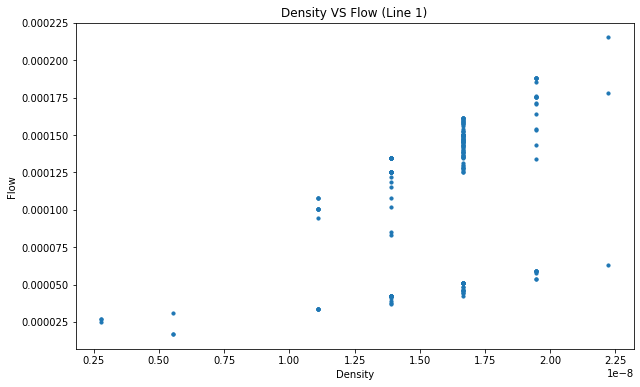

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,6))
plt.title('Density VS Flow (Line 1)')
plt.xlabel('Density')
plt.ylabel('Flow')
plt.scatter(df_cal['p'], df_cal['q'],s=10)

<Figure size 432x288 with 0 Axes>

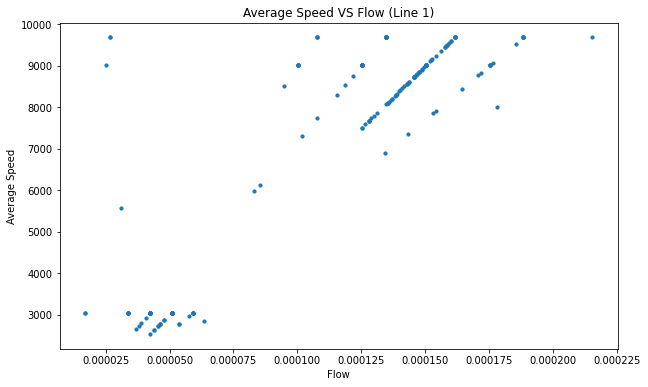

In [ ]:
fig = pyplot.figure()
plt.figure(figsize=(10,6))
plt.title('Average Speed VS Flow (Line 1)')
plt.xlabel('Flow')
plt.ylabel('Average Speed')
pyplot.scatter(df_cal['q'], df_cal['speed'],s=10)

<Figure size 432x288 with 0 Axes>

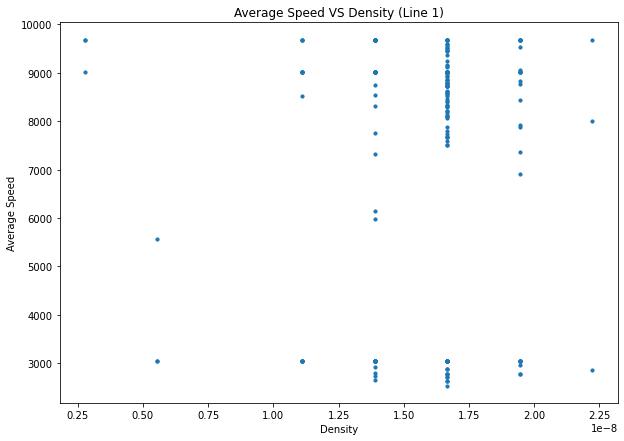

In [ ]:
fig = pyplot.figure()
plt.figure(figsize=(10,7))
plt.title('Average Speed VS Density (Line 1)')
plt.xlabel('Density')
plt.ylabel('Average Speed')
pyplot.scatter(df_cal['p'], df_cal['speed'],s=10)